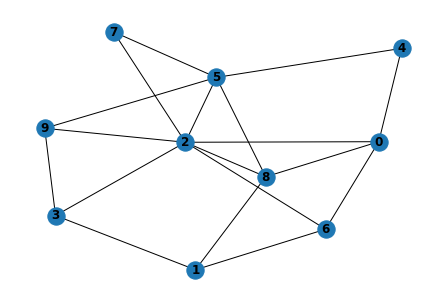

In [1]:
# Test cell to get nx and mpl working

import networkx as nx

G_test = nx.erdos_renyi_graph(10, 0.5)

nx.draw(G_test, with_labels=True, font_weight='bold')

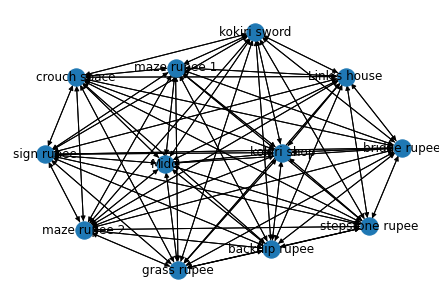

In [5]:

# List of nodes for mwe

kokiri_village_nodes = [
    "Link's house",
    "grass rupee",
    "crouch space",
    "maze rupee 1",
    "maze rupee 2",
    "kokiri sword",
    "backflip rupee",
    "sign rupee",
    "bridge rupee",
    "stepstone rupee",
    "kokiri shop",
    "Mido"
]
# Produce complete mwe

G_kok = nx.complete_graph(kokiri_village_nodes, nx.DiGraph)

nx.draw(G_kok, with_labels=True, font_color='black')
# List of edges for mwe

kokiri_village_fastest_edges = [
    ("Link's house", "grass rupee", 5.17),
    ("grass rupee", "crouch space", 9.94),
    ("crouch space", "maze rupee 2", 11.23),
    ("maze rupee 2", "kokiri sword", 3.57),
    ("kokiri sword", "maze rupee 1", 19.16),
    ("maze rupee 1", "crouch space", 7.98),
    ("crouch space", "backflip rupee", 10.53),
    ("backflip rupee", "sign rupee", 3.25),
    ("sign rupee", "bridge rupee", 8.78),
    ("bridge rupee", "stepstone rupee", 3.65),
    ("stepstone rupee", "kokiri shop", 8.86),
    ("kokiri shop", "Mido", 19.42)
]

kokiri_village_other_edges = [
    # TODO: insert edges
]

DiGraph with 78 nodes and 6006 edges


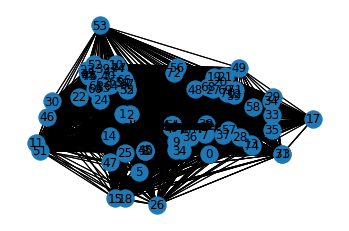

In [6]:

from math import inf

kokiri_village_edges = kokiri_village_fastest_edges + kokiri_village_other_edges

nx.set_edge_attributes(G_kok, inf, 'weight')
G_kok.add_weighted_edges_from(kokiri_village_edges)

pos_dict = nx.circular_layout(G_kok)
nx.draw_networkx(G_kok, pos_dict)
labels = nx.draw_networkx_edge_labels(G_kok, pos_dict, edge_labels=nx.get_edge_attributes(G_kok, 'weight'))
nx.shortest_path(G_kok, "Link's house", "Mido", weight='weight')
## Create complete graph from Kokiri Village InteractiveOoTMap data (Scene 85, Room 1)
import pandas as pd

im_s85r0 = pd.read_csv("resources/InteractiveOoTMap/s85r0.csv")

G_kok_im = nx.complete_graph(im_s85r0.index, nx.DiGraph)

# Add each row as node, default index as node identity
nx.set_node_attributes(G_kok_im, {k: v for (k, v) in im_s85r0.iterrows()})

position_dict = {i: (eval(r['position'])[0], eval(r['position'])[2]) for i, r in im_s85r0.iterrows()}

print(G_kok_im)
nx.draw(G_kok_im, with_labels=True, arrows=False, pos=position_dict)